## TM polarization
We should be able to see surface plasmons for a metal-air interface

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from eigenwell.src import grid,eigen_w, structure
from eigenwell.src.constants import *
import scipy.sparse.linalg as la


/Users/nathanzhao/src/eigenwell/src/pml.py:63: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(direction in ['x','y'], "direction must be 'x' or 'y'")


(100, 100)
(10000, 10000)


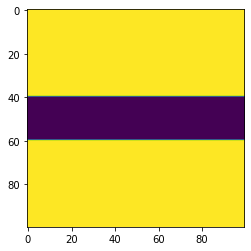

In [2]:
Nx = 100;
Ny = 100;
N = np.array([Nx, Ny]);

eps_r = np.ones(N);

a = np.array([1,1])*1e-6;
dL = a/N;
## put in a circle;
ci = int(Nx/2); cj= int(Ny/2);

eps_r = eps_r.astype('complex')
eps_r[40:60,:] = -2+1e-2*1j;

print(eps_r.shape)

plt.imshow(np.real(eps_r))
wvlen_scan = np.linspace(1.01, 20, 100);
wvlen_scan = np.logspace(np.log10(0.8), np.log10(10), 600);


fd = grid.FiniteDifferenceGrid(dL,N)

print(fd.Dxf.shape)

omega = 2*np.pi*C0/(1e-6)

st = structure.Structure(eps_r, a)


In [3]:
eigenTM = eigen_w.EigenOmega2D(st, npml = [0,20], omega_guess = None, polarization = 'TM');


In [4]:
# # if it's wrong it takes a long time to find convergence...
# eigenvals, eigenmodes = eigenTM.eigensolve(num_modes = 5)
A = eigenTM.A;
K =10
eigenvals, eigenmodes = la.eigs(A, k=K, sigma= omega**2)


[ 3.98098902e+30-1.16627338e+27j  2.23492640e+30-4.06098585e+27j
  5.95800658e+29-2.27078759e+28j  2.23491835e+30-4.06107499e+27j
 -4.10953466e+16+3.46935691e+14j  6.53061076e+30-4.36234935e+28j
  6.63666570e+30-3.44232834e+27j  7.59806442e+30-2.95108529e+28j
 -1.51611794e+30-1.68533321e+28j  9.17664671e+30-7.66872346e+27j]


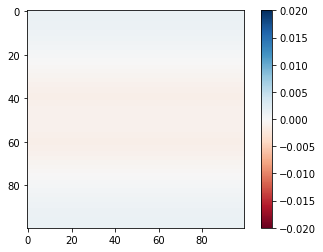

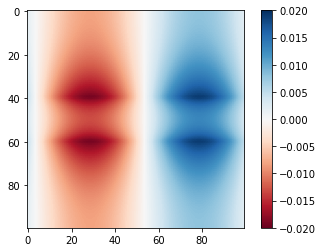

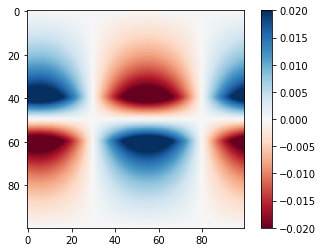

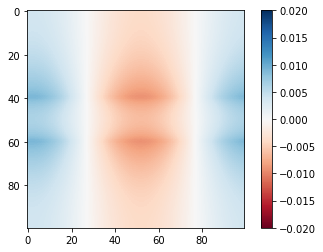

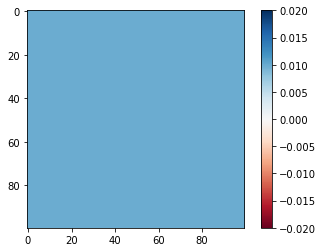

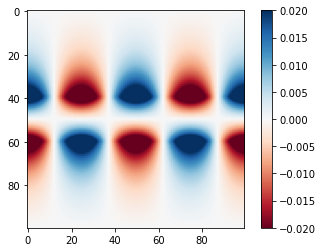

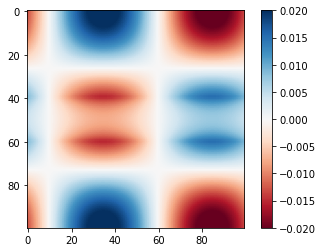

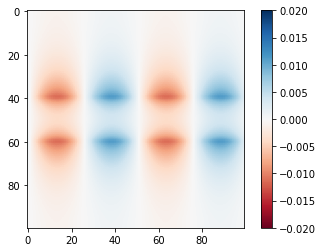

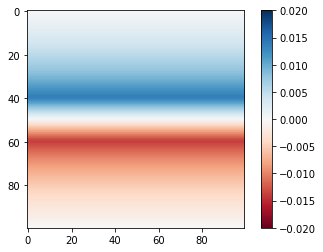

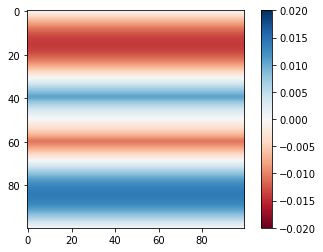

In [5]:
print(eigenvals)

for i in range(K):
    plt.imshow(np.real(eigenmodes[:,i].reshape(N, order = 'F')),cmap = 'RdBu')
    plt.clim(-0.02, 0.02)
    plt.colorbar();
    plt.show();

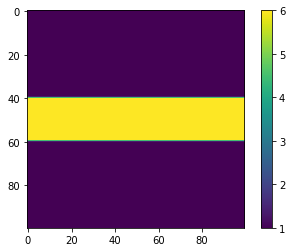

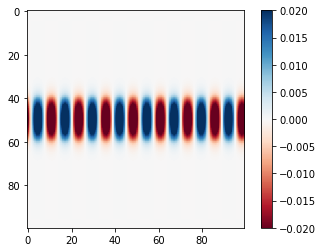

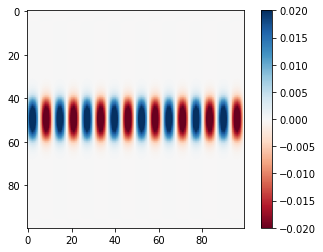

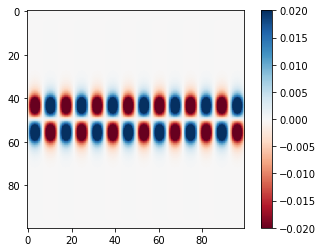

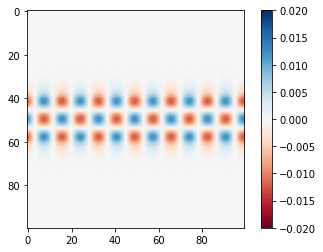

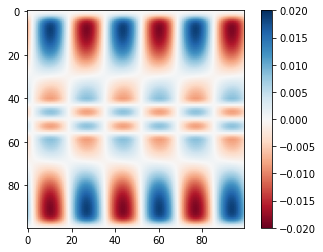

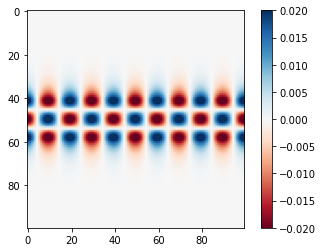

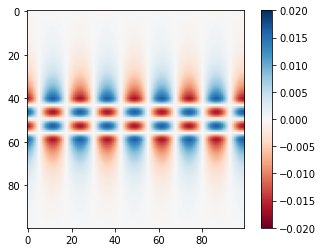

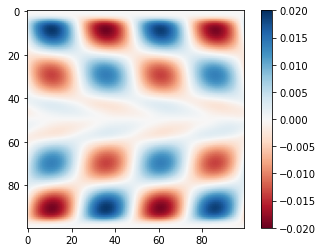

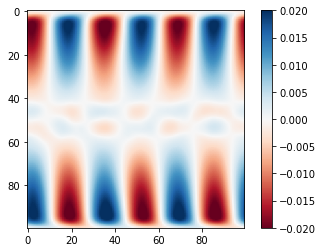

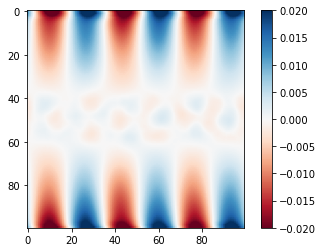

In [7]:
eps_r = np.ones(N)
eps_r[40:60,:] = 6;
plt.imshow(eps_r)
plt.colorbar();
plt.show();
st = structure.Structure(eps_r, a)

omega = 2*np.pi*C0/(0.3e-6)
#eigenTE = eigen_w.EigenOmega2D(st, npml = [0,5], omega_guess = omega, polarization= 'TE')# don't expose the finite difference class
eigenTE = eigen_w.EigenOmega2D(st, npml = [10,0], omega_guess = omega, polarization= 'TE')# don't expose the finite difference class


A = eigenTE.A;
K =10
eigenvals, eigenmodes = la.eigs(A, k=K, sigma= omega**2)

for i in range(K):
    plt.imshow(np.real(eigenmodes[:,i].reshape(N, order = 'F')),cmap = 'RdBu')
    plt.clim(-0.02, 0.02)
    plt.colorbar();
    plt.show();